In [1]:
import librosa
import numpy as np
import math
import librosa.display as display
import matplotlib.pyplot as plt
from collections import Counter
import soundfile as sf
import IPython.display as ipd

In [2]:
audio_path = 'data/Vibe - Odhora (with lyrics).wav'
#audio_path = 'data/Spiritbox - The Mara Effect live at Silverside Sound.wav'
#audio_path = 'data/Arnob-She je boshe ache.wav'

In [3]:
y, sr = librosa.load(audio_path)

In [4]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [5]:
# Compute the chroma features
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

In [6]:
# Compute the tonality
tonality = librosa.feature.tonnetz(y=y, sr=sr)

In [7]:
print(tempo)
#print(beat_frames)

129.19921875


In [8]:
def return_key_name(key):
    if key == 0:
        return "C"
    elif key == 1:
        return "C#/Db"
    elif key == 2:
        return "D"
    elif key == 3:
        return "D#/Eb"
    elif key == 4:
        return "E"
    elif key == 5:
        return "F"
    elif key == 6:
        return "F#/Gb"
    elif key == 7:
        return "G"
    elif key == 8:
        return "G#/Ab"
    elif key == 9:
        return "A"
    elif key == 10:
        return "A#/Bb"
    else :
        return "B"

In [9]:
# Compute the key
key = np.argmax(np.mean(chroma, axis=1))
key_name = return_key_name(key)
print("Key: ",key_name,"-",key)

Key:  D - 2


In [10]:
# Compute the mode
mode = 1 if np.mean(chroma[5:7]) > np.mean(chroma[-5:-3]) else 0

print("Mode: ","In Major Key -" if mode==0 else "In Minor Key -",mode)

Mode:  In Major Key - 0


In [11]:
## this function return an integer from [0,6] which corresponds mode type
def return_mode_type_value():
    ionian = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
    dorian = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
    phrygian = [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
    lydian = [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
    mixolydian = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
    aeolian = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
    locrian = [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
    
    chroma_mean = np.mean(chroma, axis=1)
    
    # Compute the correlation between the chroma features and each reference pattern
    corr_ionian = np.corrcoef(chroma_mean, ionian)[0, 1]
    corr_dorian = np.corrcoef(chroma_mean, dorian)[0, 1]
    corr_phrygian = np.corrcoef(chroma_mean, phrygian)[0, 1]
    corr_lydian = np.corrcoef(chroma_mean, lydian)[0, 1]
    corr_mixolydian = np.corrcoef(chroma_mean, mixolydian)[0, 1]
    corr_aeolian = np.corrcoef(chroma_mean, aeolian)[0, 1]
    corr_locrian = np.corrcoef(chroma_mean, locrian)[0, 1]

    # Determine the mode with the highest correlation
    mode_type = np.argmax([corr_ionian, corr_dorian, corr_phrygian, corr_lydian, corr_mixolydian, corr_aeolian, corr_locrian]) 
    return mode_type

In [12]:
def return_mode_type_name(mode_type_value):
    if mode_type_value == 0:
        return "ionian"
    elif mode_type_value == 1:
        return "dorian"
    elif mode_type_value == 2:
        return "phrygian"
    elif mode_type_value == 3:
        return "lydian"
    elif mode_type_value == 4:
        return "mixolydian"
    elif mode_type_value == 5:
        return "aeolian"
    else :
        return "locrian"

In [13]:
# Compute Mode Type
mode_type_value = return_mode_type_value()
mode_type_name  = return_mode_type_name(mode_type_value)

print("Mode Type:",mode_type_name,"-",mode_type_value)

Mode Type: lydian - 3


In [14]:
# Compute the tuning
tuning = librosa.estimate_tuning(y=y,sr=sr)
print(tuning)

0.010000000000000009


In [15]:
# Compute the timbre (Timbre)
timbre = librosa.feature.spectral_centroid(y=y, sr=sr)
print("Timbre :",timbre,np.mean(timbre))

Timbre : [[   0.            0.            0.         ... 6147.96071797
  6199.20129945 5899.36398416]] 2511.507527137918


In [16]:
# Compute the dynamics (Dynamics)
dynamics = librosa.feature.rms(y=y)
print("Dynamics:",np.max(dynamics),np.min(dynamics),np.mean(dynamics))

Dynamics: 0.32140344 0.0 0.15183555


In [17]:
# Compute the musical motif (Musical motif)
motif_matrix = librosa.feature.tempogram(y=y, sr=sr)
motif = (np.mean(motif_matrix, axis=1))
print(motif)

[1.00000000e+00 7.32159963e-01 4.89165002e-01 4.31962928e-01
 4.33735451e-01 4.37978403e-01 4.39412777e-01 4.42570056e-01
 4.76851478e-01 5.78463017e-01 6.88697533e-01 6.25678393e-01
 5.08128949e-01 4.52353502e-01 4.38871370e-01 4.37202672e-01
 4.38407195e-01 4.42434972e-01 4.82380689e-01 5.88431641e-01
 6.78635523e-01 6.06825807e-01 5.01106003e-01 4.48696367e-01
 4.33933768e-01 4.30052486e-01 4.31491251e-01 4.36134258e-01
 4.69898694e-01 5.58183672e-01 6.37961773e-01 5.92319977e-01
 4.97506057e-01 4.43322953e-01 4.27626487e-01 4.20226836e-01
 4.15224069e-01 4.17314578e-01 4.48219839e-01 5.27272890e-01
 6.09707863e-01 5.86060813e-01 4.96017859e-01 4.29781334e-01
 4.07387242e-01 4.01881757e-01 3.99435901e-01 4.03412353e-01
 4.30831671e-01 4.97964430e-01 5.67655809e-01 5.53866191e-01
 4.77242644e-01 4.11873161e-01 3.89117393e-01 3.85513317e-01
 3.83929435e-01 3.86300597e-01 4.15179612e-01 4.91630925e-01
 5.89542592e-01 5.88148060e-01 4.96097669e-01 4.09711288e-01
 3.73657530e-01 3.649290

In [18]:
# Compute the texture (Texture)
texture_matrix = librosa.feature.melspectrogram(y=y, sr=sr)
#texture_matrix = librosa.feature.spectral_contrast(y=y, sr=sr)
texture = (np.mean(texture_matrix, axis=1))
print(texture)

[5.2245765e+00 6.9556862e+01 1.6865831e+02 1.3223869e+02 5.5095097e+01
 2.8053774e+01 2.0661934e+01 2.1735958e+01 1.9191782e+01 4.4031982e+00
 7.1769204e+00 5.1413002e+00 4.4049578e+00 6.2541375e+00 9.0266638e+00
 5.7644596e+00 1.3337752e+01 4.4703465e+00 3.5693612e+00 3.4676287e+00
 6.2237473e+00 1.3149530e+01 1.6707102e+01 2.6345487e+00 7.0251551e+00
 8.3453674e+00 1.7018958e+00 2.5647135e+00 3.2858565e+00 1.8774383e+00
 1.1264161e+00 7.9993796e-01 1.3668203e+00 4.7218661e+00 2.5357435e+00
 1.3918297e+00 1.5350728e+00 3.4807472e+00 2.3161273e+00 1.1342012e+00
 9.6456659e-01 2.1015074e+00 3.0441425e+00 3.1525257e+00 4.4310188e+00
 1.3302047e+00 9.1864216e-01 1.2108946e+00 2.4999373e+00 1.2310898e+00
 6.3222373e-01 5.1424253e-01 1.1936647e+00 1.1311089e+00 7.9323983e-01
 6.4765710e-01 6.7611724e-01 9.5061493e-01 8.5325199e-01 1.9604759e+00
 7.9299295e-01 4.3667957e-01 4.1604570e-01 9.4979078e-01 8.7224692e-01
 5.3854120e-01 3.0972722e-01 7.6987076e-01 8.7767726e-01 4.3463817e-01
 5.399

In [263]:
####### don't need this feature ########
# Compute the melody (Pitch)
pitch_matrix, pitch_confidence = librosa.piptrack(y=y, sr=sr)
pitch = (np.mean(pitch_matrix, axis=1))
print(pitch)

[0. 0. 0. ... 0. 0. 0.]


In [233]:
####### don't need this feature ########
notes = librosa.key_to_notes('G:maj')
print("Notes Corresponding to Key",notes)

Notes Corresponding to Key ['C', 'C♯', 'D', 'D♯', 'E', 'F', 'F♯', 'G', 'G♯', 'A', 'A♯', 'B']


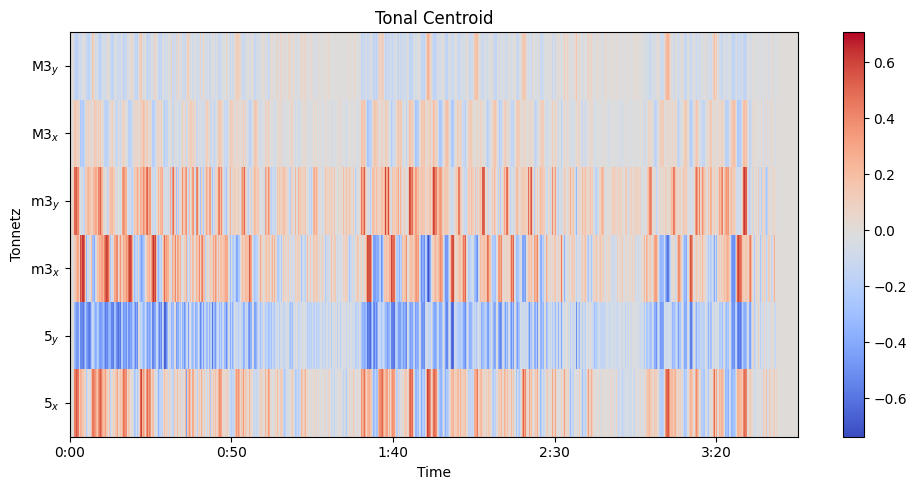

In [234]:
####### don't need this feature ########
plt.figure(figsize=(10, 5))
librosa.display.specshow(tonality, y_axis='tonnetz', x_axis='time')
plt.colorbar()
plt.title('Tonal Centroid')
plt.tight_layout()
plt.show()